In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yongsukprasertsuk
Your Kaggle Key: ··········


100%|██████████| 306M/306M [00:15<00:00, 21.1MB/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# extract zip file
import zipfile
import os
# local_zip = '/tmp/rockpaperscissors.zip'
base_dir = '/content/rockpaperscissors/rps-cv-images'
# zip_extract = zipfile.ZipFile(local_zip, 'r')
# zip_extract.extractall('/tmp')
# zip_extract.close()

In [ ]:
# image augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split = 0.4
)
train_datagen

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [ ]:
# count loss function and optimizer
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']               
)

In [ ]:
# callbacks
accuracy_threshold = 98e-2
class my_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nFor Epoch', epoch, '\nAccuracy has reach = %2.2f%%' %(logs['accuracy']*100), 'training has been stopped.')
            self.model.stop_training = True

In [ ]:
# train data
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [my_callbacks()]
)

Epoch 1/20
25/25 - 14s - loss: 1.0836 - accuracy: 0.4442 - val_loss: 0.8092 - val_accuracy: 0.6687 - 14s/epoch - 563ms/step
Epoch 2/20
25/25 - 5s - loss: 0.6732 - accuracy: 0.7416 - val_loss: 0.3009 - val_accuracy: 0.8875 - 5s/epoch - 214ms/step
Epoch 3/20
25/25 - 5s - loss: 0.2807 - accuracy: 0.8896 - val_loss: 0.2697 - val_accuracy: 0.9000 - 5s/epoch - 208ms/step
Epoch 4/20
25/25 - 5s - loss: 0.2546 - accuracy: 0.9091 - val_loss: 0.2712 - val_accuracy: 0.9062 - 5s/epoch - 205ms/step
Epoch 5/20
25/25 - 5s - loss: 0.1972 - accuracy: 0.9351 - val_loss: 0.1943 - val_accuracy: 0.9500 - 5s/epoch - 214ms/step
Epoch 6/20
25/25 - 5s - loss: 0.1676 - accuracy: 0.9400 - val_loss: 0.2949 - val_accuracy: 0.9438 - 5s/epoch - 211ms/step
Epoch 7/20
25/25 - 5s - loss: 0.1274 - accuracy: 0.9610 - val_loss: 0.1002 - val_accuracy: 0.9625 - 5s/epoch - 206ms/step
Epoch 8/20
25/25 - 5s - loss: 0.1507 - accuracy: 0.9610 - val_loss: 0.2041 - val_accuracy: 0.9312 - 5s/epoch - 213ms/step
Epoch 9/20
25/25 - 5s 

Saving Rock-paper-scissors_(paper).png to Rock-paper-scissors_(paper).png
1/1 [==============================] - 0s 30ms/step
Rock-paper-scissors_(paper).png
rock


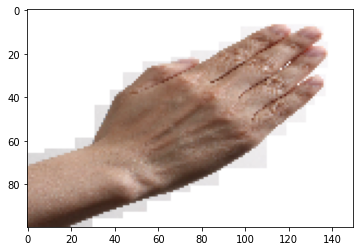

In [ ]:
import numpy as np
from google.colab import files
import keras.utils as image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # predict images
  path = fn
  img_source = image.load_img(path, target_size = (100, 150))
  imgplot = plt.imshow(img_source)
  x = image.img_to_array(img_source)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(fn)
  if classes[0, 0] == 1:
    print('paper')
  elif classes[0, 1] == 1:
    print('rock')
  elif classes[0, 2] == 1:
    print('scissors')